In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [13]:
!pip install imbalanced-learn
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#choose to run with colab, run the following code in advance
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

**ref:**

https://medium.com/analytics-vidhya/knn-vs-decision-tree-vs-random-forest-for-handwritten-digit-recognition-470e864c75bc

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [1]:
def get_detaset():
    train_df = pd.read_csv('classification-of-mnist-digits/train.csv')
    train = train_df.to_numpy()
    test_df = pd.read_csv('classification-of-mnist-digits/test.csv')
    test = test_df.to_numpy()
    train_result_df = pd.read_csv('classification-of-mnist-digits/train_result.csv')
    train_result = train_result_df.to_numpy()
    return train, test, train_result

def split_testset(data):
    data = np.delete(data, -1, axis=1)
    #z-score standardization
    standardize_data = (data-np.mean(data, axis=1)[:,np.newaxis])/np.std(data, axis=1)[:,np.newaxis]
    return data

def treat_dataset(data, data_result):
    data = np.delete(data, -1, axis=1)
    #z-score standardization
    standardize_data = (data-np.mean(data, axis=1)[:,np.newaxis])/np.std(data, axis=1)[:,np.newaxis]
    
    data_result = np.delete(data_result, 0, axis=1)
    return data,data_result.flatten()

In [5]:
train, test, train_result = get_detaset()
test_data = split_testset(test)
X_treat, y_treat = treat_dataset(train, train_result)

(50000,)


<BarContainer object of 19 artists>

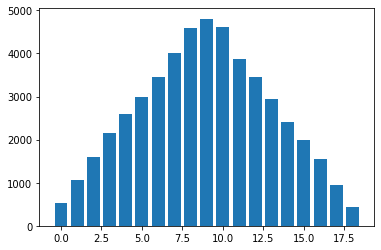

In [6]:
print(y_treat.shape)
y = Counter(y_treat)
plt.bar(y.keys(), y.values())

In [7]:
oversample = SMOTE()
# fit and apply the transform
X_treat_over, y_treat_over = oversample.fit_resample(X_treat, y_treat)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_treat_over,y_treat_over,test_size=0.2, random_state=30, stratify=y_treat_over)

(73066,)


<BarContainer object of 19 artists>

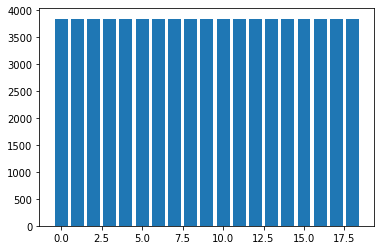

In [9]:
print(y_train.shape)
y = Counter(y_train)
plt.bar(y.keys(), y.values())

Single Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
import seaborn as sn

CPU times: user 1min 55s, sys: 404 ms, total: 1min 55s
Wall time: 1min 56s


Text(69.0, 0.5, 'Truth')

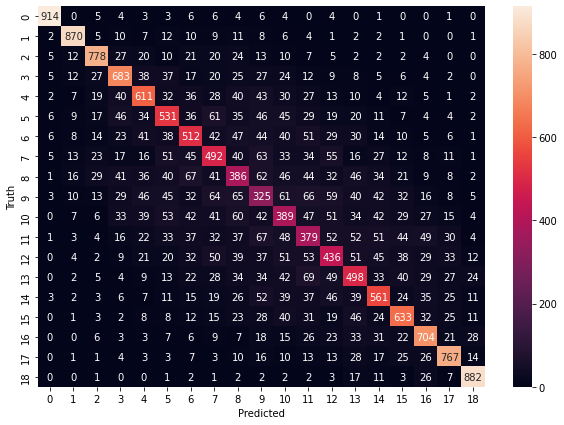

In [11]:
dtree = DecisionTreeClassifier()
%time dtree.fit(X_train , y_train)
y_pred = dtree.predict(X_test)
cmdtree = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cmdtree ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
print("acc = ",(y_pred == y_test).mean())

acc =  0.6213937701866754


In [15]:
with open('dtree.pickle', 'wb') as f:
    pickle.dump(dtree, f)

In [16]:
with open('dtree.pickle', 'rb') as f:
    dtree = pickle.load(f)

In [23]:
y_pred = dtree.predict(X_test)
print((y_pred == y_test).mean())

0.6213937701866754




Random Forest



In [18]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn


CPU times: user 3min 30s, sys: 461 ms, total: 3min 31s
Wall time: 3min 36s


0.8794000109487053

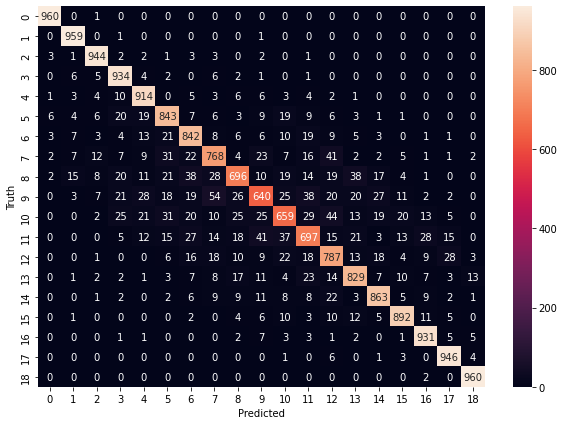

In [19]:
rforest = RandomForestClassifier()
%time rforest.fit(X_train , y_train)
y_pred_tree = rforest.predict(X_test)
cmrforest = confusion_matrix(y_test , y_pred_tree)
plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
rforest.score(X_test,y_test)

In [26]:
print("acc = ",(y_pred_tree == y_test).mean())

acc =  0.8794000109487053


In [27]:
with open('rforest.pickle', 'wb') as f:
    pickle.dump(rforest, f)

In [28]:
#the .pickle document is really large 600+mb
with open('rforest.pickle', 'rb') as f:
    rforest = pickle.load(f)

In [29]:
y_pred_tree = rforest.predict(X_test)
print("acc = ",(y_pred_tree == y_test).mean())

acc =  0.8794000109487053


In [ ]:
y_submit = rforest.predict(test_data)
y_submit

array([14,  7, 10, ..., 10,  4,  6])

In [ ]:
df_submit = pd.DataFrame(y_submit, columns = ['Class'])
# submission
df_submit=df_submit.reset_index()
df_submit.rename(columns = {'index':'Index'}, inplace = True)
df_submit.to_csv('./Rforest.csv', index = False)